# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [4]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')
image_copy=np.copy(image)

# Print out the image dimensions (height, width, and depth (color))
print('this image is:',type(image),'with dimensions:',image.shape)


this image is: <class 'numpy.ndarray'> with dimensions: (450, 660, 3)


[ 41 253  47]


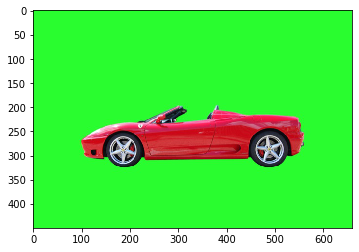

In [5]:
# Display the image
plt.imshow(image)
# print specific pixels value
x = 190
y = 100
pixel_value = image[y,x]
print(pixel_value)

166


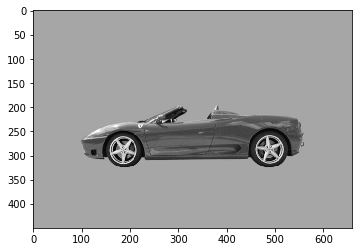

In [6]:
# change from color to gray
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')
# print specific pixels value
x = 100
y = 100
gray_pixel_value = gray_image[y,x]
print(gray_pixel_value)

### Define the color threshold

In [7]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,100,0]) 
upper_green = np.array([80,255,80])

### Create a mask

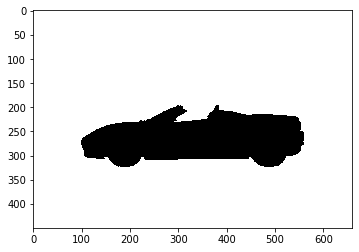

In [8]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

In [9]:
print(mask[250,300])

0


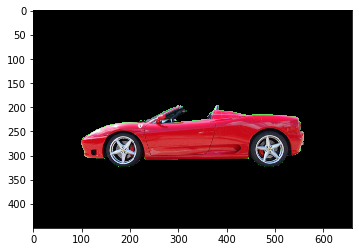

In [10]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

Image dimensions: (575, 1024, 3)


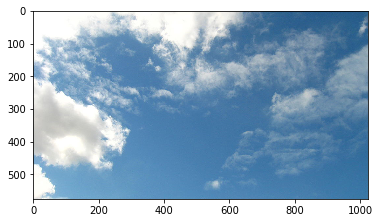

In [11]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
plt.imshow(background_image)
print('Image dimensions:', background_image.shape)


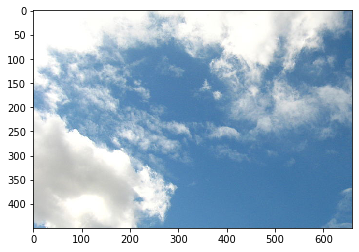

In [12]:
#: Crop it or resize the background to be the right size (450x660)
crop_background_image = background_image[0:450,0:660]
plt.imshow(crop_background_image)
#plt.imshow(crop_background_image)

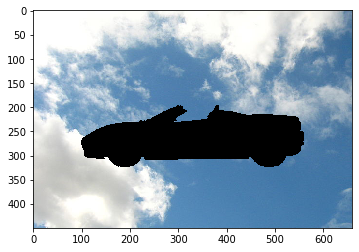

In [13]:
## Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
crop_background = np.copy(crop_background_image)
crop_background[mask == 0] = [0,0,0]

## Display the background and make sure 
plt.imshow(crop_background)


### Create a complete image

In [14]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
print('Masked Image dimensions:', masked_image.shape)


Masked Image dimensions: (450, 660, 3)


In [15]:
print('background Image dimensions:', crop_background.shape)

background Image dimensions: (450, 660, 3)


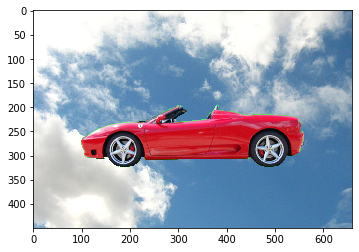

In [16]:
complete_image = masked_image + crop_background
plt.imshow(complete_image)

In [103]:
mpimg.imsave('skyandcar.jpg',complete_image)